Solve: $$5xdx+2(x+y)dy=0,\quad x+y\neq0$$

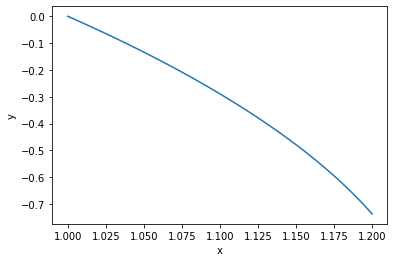

In [4]:
##Numerical solution

import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

##function that returns dy/dx
def model(y,x):
    dydx = -5*x/(2*(x+y))
    return dydx
    
##initial condition y(1)=0; y+x=!0
y0 = 0
## time points
xs= np.linspace(1,1.2,100)                


##solve ode with odeint
ysn= odeint(model,y0,xs)
ysn= np.array(ysn).flatten()

##plot numerical solution
plt.plot(xs,ysn)
plt.xlabel('x')
plt.ylabel('y')
plt.show()

The implicit solution of the form

$$f(x,y,c)=0\quad$$

is,
$$
\begin{align}
f(x,y,K)=ln|x|+ln\sqrt{2\frac{y}{x}^2+\frac{2y}{x}+5}+\frac{1}{3}arctan(\frac{\frac{2y}{x}+1}{3})+K
\end{align}
$$


which solutions will be a family of curves in the plane OXY.

Dada la EDO y'=f(x,y), se llaman isoclinas a las curvas de ecuación y'=k, es decir a las curvas f(x,y)=k, donde k es una cte.

In [5]:
##x=1, y=0, k=?
x,y=1,0
K= np.log(x)+np.log(np.sqrt(2*((y/x)**2)+ 2*(y/x)+5))+1/3*np.arctan((2*(y/x)+1)/3)
print(K) 

0.911969141015931


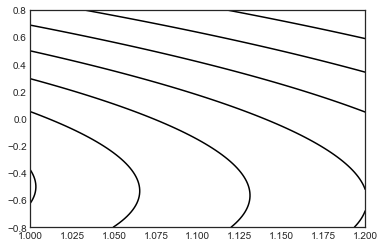

In [4]:
##https://jakevdp.github.io/PythonDataScienceHandbook/04.04-density-and-contour-plots.html

%matplotlib inline
plt.style.use('seaborn-white')

#xs= np.linspace(1,1.2,100)
ys =np.linspace(0.8,-0.8,100)

def fs(xs, ys):
     return np.log(xs)+np.log(np.sqrt(2*((ys/xs)**2)+ 2*(ys/xs)+5))+1/3*np.arctan((2*(ys/xs)+1)/3) + K

##np.meshgrid function, which builds two-dimensional grids from one-dimensional arrays
X, Y = np.meshgrid(xs, ys)

Z = fs(X,Y)

plt.contour(X, Y, Z, colors='black');



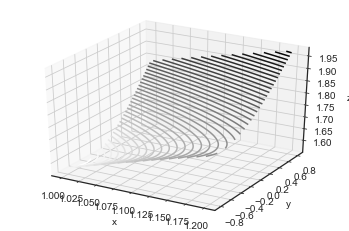

In [6]:
###akevdp.github.io/PythonDataScienceHandbook/04.12-three-dimensional-plotting.html

from mpl_toolkits import mplot3d
%matplotlib inline

fig = plt.figure()
ax = plt.axes(projection='3d')
ax.contour3D(X, Y, Z, 50, cmap='binary')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z');

C:\Users\Blanca\Anaconda2\lib\site-packages\ipykernel_launcher.py:33: RuntimeWarning: invalid value encountered in log


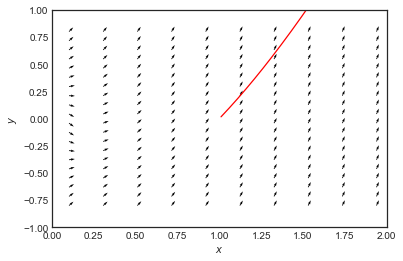

In [15]:
from scipy import *
from scipy import integrate
from scipy.integrate import ode
import numpy as np

fig = plt.figure(num=1)
ax=fig.add_subplot(111)
## Vector field functionn
def vf(t,x):
  dx=np.zeros(2)
  dx[0]=1
  dx[1]=np.log(x[0])+np.log(np.sqrt(2*((x[1]/x[0])**2)+ 2*(x[1]/x[0])+5))+1/3*np.arctan((2*(x[1]/x[0])+1)/3) + K
  return dx

#Solution curves
t0=0; tEnd=10; dt=0.01; ##integration steps
r = ode(vf).set_integrator('vode', method='bdf',max_step=dt)
ic=[[1,0]]
color=['r']
for k in range(len(ic)):
    Y=[];T=[];S=[];
    r.set_initial_value(ic[k], t0).set_f_params()
    while r.successful() and r.t +dt < tEnd:
        r.integrate(r.t+dt)
        Y.append(r.y)

    S=np.array(np.real(Y))
    ax.plot(S[:,0],S[:,1], color = color[k], lw = 1.25)

#Vector field
X,Y = np.meshgrid( np.linspace(-5,5,50),np.linspace(0.8,-0.8,20))
U = 1
V = np.log(X)+np.log(np.sqrt(2*((Y/X)**2)+ 2*(Y/X)+5))+1/3*np.arctan((2*(Y/X)+1)/3) + K

#Normalize arrows
N = np.sqrt(U**2+V**2)  
U2, V2 = U/N, V/N
ax.quiver( X,Y,U2, V2)


plt.xlim([0,2])
plt.ylim([-1,1])
plt.xlabel(r"$x$")
plt.ylabel(r"$y$")
plt.show()